In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set logging to stdout
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [27]:
from geolifeclef.loaders.GLC23PatchesProviders import (
    MultipleRasterPatchProvider,
    RasterPatchProvider,
    JpegPatchProvider,
)
from geolifeclef.loaders.GLC23Datasets import PatchesDataset

# root path of the data
data_path = "/mnt/data/raw/"
# take all rasters from human footprint detailed (2 rasters here)
p_hfp_d = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/detailed/"
)
# take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_bioclim = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/",
    select=["bio1", "bio2"],
)
# take the human footprint 2009 summurized raster (a single raster)
p_hfp_s = RasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif"
)
# take all sentinel imagery layers (r,g,b,nir = 4 layers)
p_rgb = JpegPatchProvider(
    data_path + "SatellitePatches/",
    # very inefficient normalization in the data loading library
    normalize=False,
)

downloaded_path = "/mnt/data/downloaded/"
dataset = PatchesDataset(
    occurrences=downloaded_path + "PresenceOnlyOccurrences/GLC24-PO-metadata-train.csv",
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb),
)
len(dataset)

5079797

In [28]:
dataset.provider

Providers:
Rasters in folder:
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884

In [30]:
res = dataset[0]
res[0].shape

torch.Size([21, 128, 128])

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 5704.0


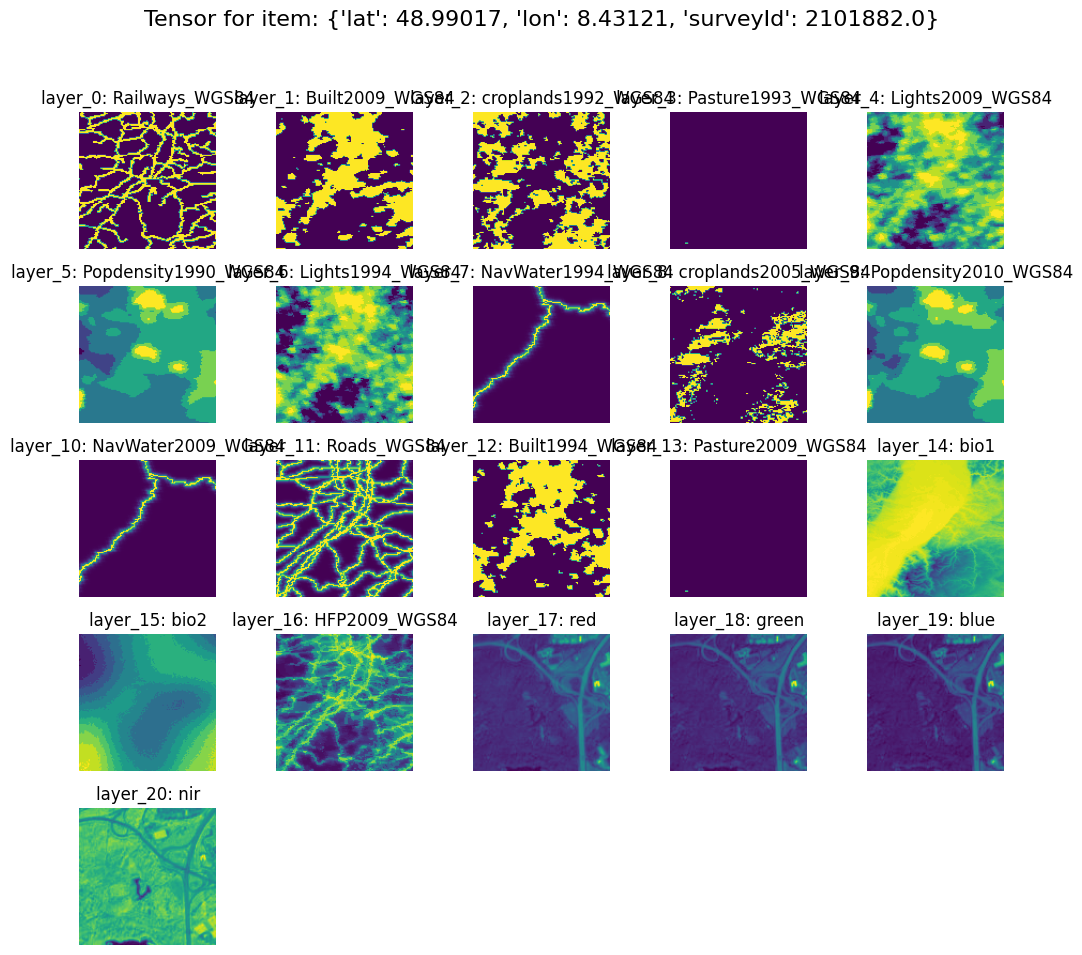

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 4549.0


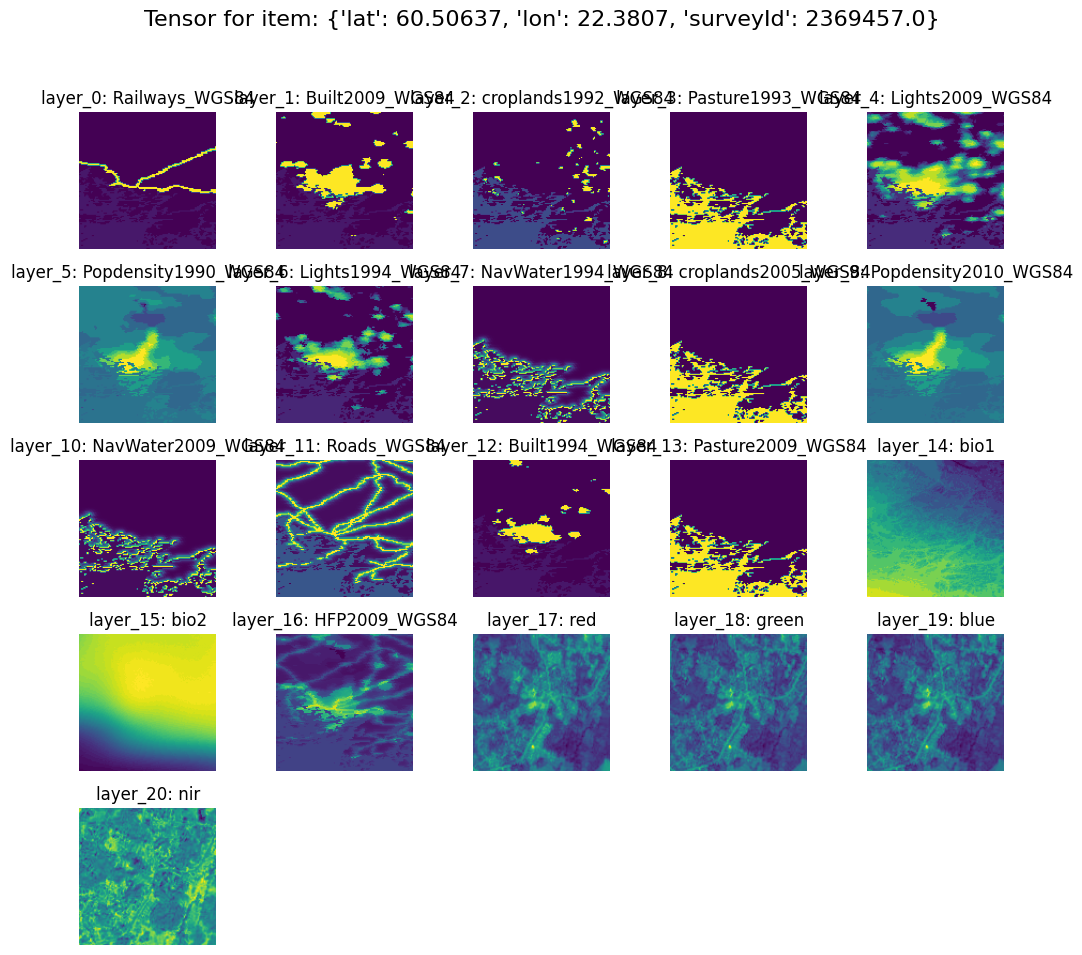

In [29]:
import random

ids = [random.randint(0, len(dataset) - 1) for i in range(2)]
for id in ids:
    tensor, label = dataset[id]
    print(
        "Tensor type: {}, tensor shape: {}, label: {}".format(
            type(tensor), tensor.shape, label
        )
    )
    dataset.plot_patch(id)